# Seleccionando características significativas

Si se observa que un modelo tiene mejor rendimiento con el conjunto de entrenamiento que con
el de pruebas, es un indicador de sobreajuste; esto significa que el modelo adecúa sus parámetros
a las observaciones de los datos de entrenamiento, pero no generaliza bien a nuevos datos.
Entre las posibles soluciones al sobreajuste, se tiene la **reducción de la dimensión de los datos**.

Mientras más caracteristicas (columnas) tengamos será más lento el algortimo. Pude darse le sobre ajuste, el motivo porque hay dos o más columnas extras.

## Selección secuencial de características

Los algoritmos de selección secuencial son una familia de algoritmos voraces (greedy) usados
para reducir la dimensión d de características a un subespacio de dimensión $k$ que cumple $k < d$.

El objetivo es seleccionar automáticamente un subconjunto de características que sean las
más relevantes para el problema; con esto se puede mejorar la eficiencia o reducir errores de
generalización del modelo al eliminar características irrevantes o ruido.

## Sequential Backward Selection (Secuencial hacia atras)

Un algoritmo de selección común es el llamado **Sequential Backward Selection (SBS )** cuyo objetivo es reducir la dimensión del espacio de características con un mínimo de pérdidas en el rendimiento del modelo mejorando la eficiencia computacional. Además, SBS puede mejorar también el poder predictivo de un modelo si está sobreajustado.

La idea detrás de SBS es simple: eliminar secuencialmente características de un conjunto hasta que se tenga el número deseado de ellas. Para determinar qué columna eliminar se debe establecer una función criterio J ; uno muy usado es simplemente comparar el rendimiento del modelo antes y después de eliminar una columna; la característica a eliminar será aquella que cause el menor descenso en el rendimiento. 

El algoritmo puede describirse en cuatro pasos:



1. Inicializar el algoritmo con k = d, d es la dimensión del espacio original de características $X_d$

2. Determinar la característica $x^−$ que maximiza el criterio: $x^−$ = arg máx $(J (X k − x))$, donde $x$ ∈ $X_k$

3. Eliminar la característica $x⁻$ del conjunto: $X_k−1$ = $X_k − x^− ; k = k − 1$

4. Si k es mayor que el número deseado de características, repetir desde el paso 2; de otro
modo, terminar la ejecución



La idea basicamente es seleccionar la ultima columna, penultima,
eliminamos una en cada paso del algortimo, vemos que tan bien o mal se comporta al quitar esa columna, y nos quedamos con aquel que obtegamos el mejor rendimiento. Eliminar la columna que me perjudique menos, la que menos peso tiene en el algortimo que estoy usando,

La J es un algortimo de aprendizaje que me sirve para saber con cual de las columnas me puedo quedar.

Eliminar aquellas que no perjudiquen mi algortimo.


Esto es muy debandante ya que tengo que ejecutar el algortimo con todas las columas y despues quitar una y ver que tanto me perjudico mi algortimo quitando esa columna, y repito nuevamente quitando la siguientem, etc. hasta quedarme con la $k$ que me hayan indicado.

## Ejemplo 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [6]:
data = pd.read_csv('https://bit.ly/3yWJipU')
data.head()

,altura,peso,talla
0,170,64,L
1,168,62,L
2,163,60,M
3,168,63,L
4,158,63,M


In [3]:
data.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
altura,170,168,163,168,158,160,168,165,160,158,169,158,170,165,161,170,163,160,165,163
peso,64,62,60,63,63,60,66,61,59,59,67,58,63,65,60,68,61,64,62,64
talla,L,L,M,L,M,M,L,L,M,M,L,M,L,L,M,L,M,L,L,L


Este es un ejemplo de $3$ columnas, la talla nos ayudara a evaluar nuestro algortimo.

## Preprocessamiento

Agregamos una nueva columna que nos marque el color segun la talla L -> 1 y M -> 0.

In [7]:
talla_map = {'L': 1, 'M': 0}
data['color'] = data.talla.map(talla_map)
data.head()

,altura,peso,talla,color
0,170,64,L,1
1,168,62,L,1
2,163,60,M,0
3,168,63,L,1
4,158,63,M,0


In [8]:
data.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
altura,170,168,163,168,158,160,168,165,160,158,169,158,170,165,161,170,163,160,165,163
peso,64,62,60,63,63,60,66,61,59,59,67,58,63,65,60,68,61,64,62,64
talla,L,L,M,L,M,M,L,L,M,M,L,M,L,L,M,L,M,L,L,L
color,1,1,0,1,0,0,1,1,0,0,1,0,1,1,0,1,0,1,1,1


## Graficamos nuestros puntos


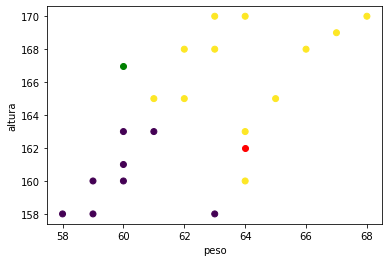

In [11]:
plt.scatter(data.peso, data.altura, c=data.color)


# Creando un nuevo punto
new = pd.DataFrame([ [162, 64, None, None]])
new.columns = ['altura', 'peso', 'talla', 'color']
plt.scatter(new.peso, new.altura, color='r')

# Creando un nuevo punto
new = pd.DataFrame([ [167, 60, None, None]])
new.columns = ['altura', 'peso', 'talla', 'color']
plt.scatter(new.peso, new.altura, color='g')

plt.xlabel('peso')
plt.ylabel('altura')b
plt.show()


Puntos amarillos, son los de talla grande

Puntos morados, talla pequeña

Punto verde es punto que nosotros creamos

Punto rojo es punto que nosotros creamos


Con estos nuevmos puntos, queremos determinar ¿a qué tallan pertenecen?

De manera intuitiva podemos determinar que el punto rojo deberia ser amarillo y el verde podria ser igualmente amarillo.


Necesitaremos un algortimo de clasificacion que se encarge de determinar a que clase pertenece.

## Algortimo de clasificacion: K-vecinos

Este algortimo se encarga se calcular las distancias euclidianas hacia a cada uno de los puntos y el marcador que nos indicara a cual pertenece sera las distancias más cortas de una cierta cantidad $k$ de vecinos.

In [ ]:
# En este momento no lo implementaresmo, será más adelante,
# solo explica la idea del algortimo para ver como clasificar
# esos puntos

La idea es que si quitamos una columnas, solo tiene dos opciones quitar peso o altura, si quitamos peso, vemos como se evalua nuestro algortimo de k-vecinos con solo la columna de la altura, vemos clasificaria esos dos puntos, ahora si quitamos la columna de la altura, probamos nuevamente nuestro algoritmo y vemos como clasificaria esos dos puntos con solo la columna de peso.

# Ejemplo 2

Lo ahoremos ahora con un conjunto más interesante, que tiene mucha más dimensiones.

### Importacion de librerias

In [14]:
# Ejemplo de la implementacion SBS

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Cargando nuestro dataset

In [13]:
# df_wine = pd.read_csv('https:\\archive.ics.uci.edu/ml/machine-learning-databases/wine/')
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',
                     header=None)
# Total de 13 caracteristicas
df_wine.columns = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
                   'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
df_wine.tail()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


##  Preprocesamiento de datos

In [15]:
from sklearn.model_selection import train_test_split

# Datos de entrenamiento y prueba
X, y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Estandarizamos 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
import numpy as np
# La utilizaremos precisamente combinations por la idea
# de ir moviendonos, quitando una columna y a ver  que sucede
# una y cada una de ellas y despues tomar la que nos regrese el
# mejor resultado, asi para todas las combinaciones posibles.
from itertools import combinations
from sklearn.base import clone
from sklearn.metrics import accuracy_score

### Reduccion de datos


In [ ]:

class SBS():
    def __init__(self, estimador, k_features, scoring=accurancy_score, ...)

    # Funcion ajuste
    def fit(self, X, y):
        pass    
    # Funcion para transformar
    def transform(self, X):
        pass
    # Una funcion que nos diga que tan bien o mal se comporta nuestro algortimo
    # comparado con la iteracion anterior
    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        pass

### Usando el Modelo K-Vecinos

In [ ]:
import matplotlib.pyploy as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

sbs = SBS(knn, k_feactures=1)
sbs.fit(X_train_std, y_train)

### Graficación

In [ ]:
k_feat = [len(k) for k in sbs.subsets_]


Hacer la implementacion sbs y regresar al video por min 1:02 aprox